## TauRAMD vs UMD Unbinding


Original Contingency Table (Observed Frequencies):
      WT  UMD-UnBinding
T1   19             23
T10   3              0
T2    7             56
T3    1              9
T4    5              1
T5   27              3
T6   11              0
T7    2              0
T8    0              6

Chi-Square Test Results:
Chi2 Statistic: 87.2430
P-value: 0.000000000000001684907877936796
Degrees of Freedom: 8

Expected Frequencies:
             WT  UMD-UnBinding
T1   18.208092      23.791908
T10   1.300578       1.699422
T2   27.312139      35.687861
T3    4.335260       5.664740
T4    2.601156       3.398844
T5   13.005780      16.994220
T6    4.768786       6.231214
T7    0.867052       1.132948
T8    2.601156       3.398844

Population Percentages (Relative to Each Dataset):
         WT (%)  UMD-UnBinding (%)
T1   25.333333          23.469388
T10   4.000000           0.000000
T2    9.333333          57.142857
T3    1.333333           9.183673
T4    6.666667           1.020408
T5   36.000000        

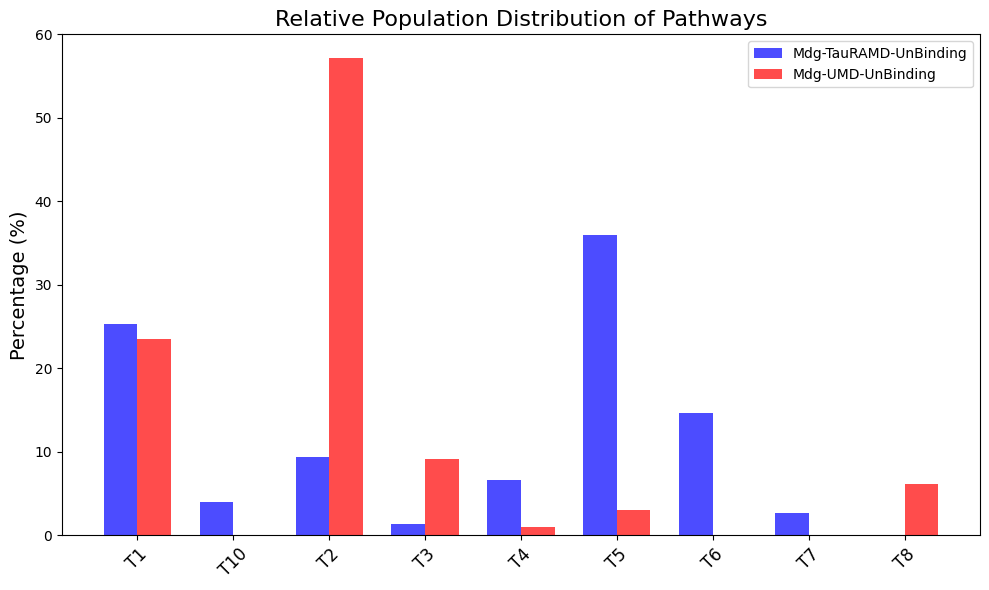

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Read data from Excel
df_WT = pd.read_excel('DSSP-ExitPoint.xlsx', sheet_name='Mdg-H2-TauRAMD')
df_UMD_Unbinding = pd.read_excel('DSSP-ExitPoint.xlsx', sheet_name='Mdg-UMD-UnBinding')

# Extract frequency counts for pathways
wt_counts = df_WT['Pathway-new'].value_counts().sort_index()
umd_counts = df_UMD_Unbinding['Tunnels-out'].value_counts().sort_index()

# Ensure both categories match (fill missing values with 0)
all_categories = sorted(set(wt_counts.index).union(set(umd_counts.index)))

# Construct contingency table
data_matrix = np.array([[wt_counts.get(cat, 0), umd_counts.get(cat, 0)] for cat in all_categories])

# Convert to DataFrame for better readability
df_contingency = pd.DataFrame(data_matrix, index=all_categories, columns=['WT', 'UMD-UnBinding'])

# Print the original data matrix
print("\nOriginal Contingency Table (Observed Frequencies):\n", df_contingency)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(data_matrix)

# Convert expected values to DataFrame for clarity
df_expected = pd.DataFrame(expected, index=all_categories, columns=['WT', 'UMD-UnBinding'])

# Print Chi-Square test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.30f}")
print(f"Degrees of Freedom: {dof}")

# Print expected frequency table
print("\nExpected Frequencies:\n", df_expected)

# Compute **percentages within each dataset** separately
wt_total = data_matrix[:, 0].sum()  # Sum of WT column
umd_total = data_matrix[:, 1].sum()  # Sum of UMD-UnBinding column

wt_percentages = (data_matrix[:, 0] / wt_total) * 100  # WT percentages
umd_percentages = (data_matrix[:, 1] / umd_total) * 100  # UMD percentages

# Convert to DataFrame
df_percentages = pd.DataFrame({'WT (%)': wt_percentages, 'UMD-UnBinding (%)': umd_percentages}, index=all_categories)

# Print population percentages
print("\nPopulation Percentages (Relative to Each Dataset):\n", df_percentages)

# Compute contribution of each cell to the chi-square statistic
chi2_contributions = (data_matrix - expected) ** 2 / expected

# Convert to DataFrame for better readability
df_contributions = pd.DataFrame(chi2_contributions, index=all_categories, columns=['WT', 'UMD-UnBinding'])

# Sum contributions per pathway (row-wise)
df_contributions['Total Contribution'] = df_contributions.sum(axis=1)

# Sort by contribution if desired
df_contributions_sorted = df_contributions.sort_values(by='Total Contribution', ascending=False)

# Print contributions
print("\nChi-Square Contributions per Pathway:\n", df_contributions_sorted)

# Plot bar chart for **percentage relative to each dataset**
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of bars
x = np.arange(len(all_categories))  # X locations

# Plot bars
ax.bar(x - bar_width / 2, wt_percentages, width=bar_width, label='Mdg-TauRAMD-UnBinding', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, umd_percentages, width=bar_width, label='Mdg-UMD-UnBinding', color='red', alpha=0.7)

# Set labels
ax.set_xticks(x)
ax.set_xticklabels(all_categories, fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_title('Relative Population Distribution of Pathways', fontsize=16)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig('Mdg-TauRMAD-vs-UMD-UnBinding.png', dpi=300)


## UMD Unbinding vs UMD Binding


Original Contingency Table (Observed Frequencies):
     UMD-Binding  UMD-UnBinding
T1           22             23
T2           47             56
T3           13              9
T4            2              1
T5            0              3
T8           15              6

Chi-Square Test Results:
Chi2 Statistic: 8.7215
P-value: 0.1207
Degrees of Freedom: 5

Expected Frequencies:
     UMD-Binding  UMD-UnBinding
T1    22.614213      22.385787
T2    51.761421      51.238579
T3    11.055838      10.944162
T4     1.507614       1.492386
T5     1.507614       1.492386
T8    10.553299      10.446701

Population Percentages (Relative to Each Dataset):
     UMD-Binding (%)  UMD-UnBinding (%)
T1        22.222222          23.469388
T2        47.474747          57.142857
T3        13.131313           9.183673
T4         2.020202           1.020408
T5         0.000000           3.061224
T8        15.151515           6.122449

Chi-Square Contributions per Pathway:
     UMD-Binding  UMD-UnBinding  Tota

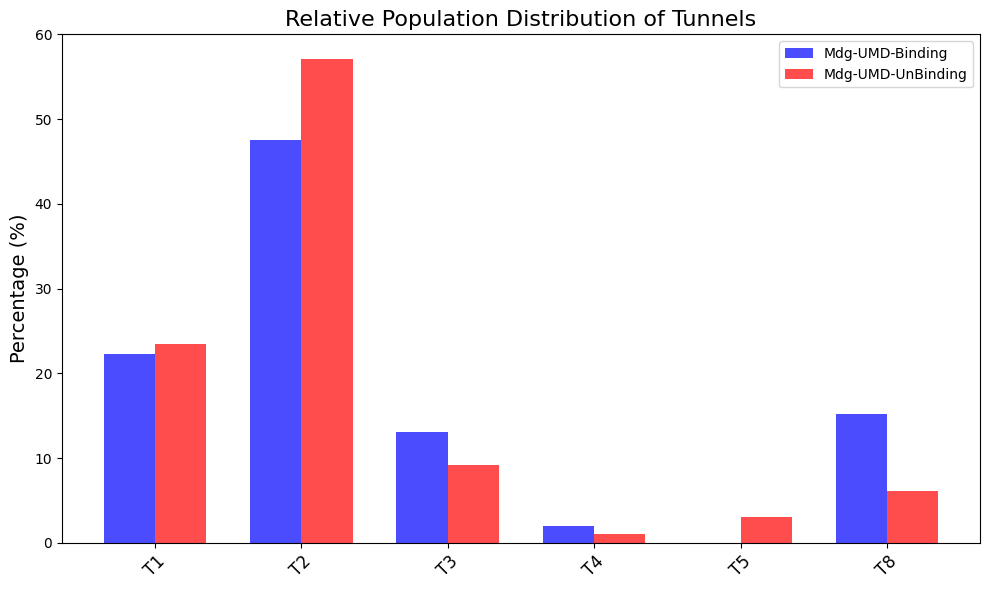

In [7]:

# Read data from Excel
df_UMD_Binding = pd.read_excel('DSSP-ExitPoint.xlsx', sheet_name='Mdg-UMD-Binding')
df_UMD_Unbinding = pd.read_excel('DSSP-ExitPoint.xlsx', sheet_name='Mdg-UMD-UnBinding')

# Extract frequency counts for tunnels
UMD_Binding_counts = df_UMD_Binding['Tunnels-in'].value_counts().sort_index()
UMD_UnBinding_counts = df_UMD_Unbinding['Tunnels-out'].value_counts().sort_index()

# Ensure both categories match (fill missing values with 0)
all_categories = sorted(set(UMD_Binding_counts.index).union(set(UMD_UnBinding_counts.index)))

# Construct contingency table
data_matrix = np.array([[UMD_Binding_counts.get(cat, 0), UMD_UnBinding_counts.get(cat, 0)] for cat in all_categories])

# Convert to DataFrame for better readability
df_contingency = pd.DataFrame(data_matrix, index=all_categories, columns=['UMD-Binding', 'UMD-UnBinding'])

# Print the original contingency table
print("\nOriginal Contingency Table (Observed Frequencies):\n", df_contingency)

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(data_matrix)

# Convert expected frequencies to DataFrame
df_expected = pd.DataFrame(expected, index=all_categories, columns=['UMD-Binding', 'UMD-UnBinding'])

# Print Chi-Square test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Print expected frequency table
print("\nExpected Frequencies:\n", df_expected)

# Compute **percentages within each dataset separately**
UMD_Binding_total = data_matrix[:, 0].sum()  # Sum of UMD-Binding column
UMD_UnBinding_total = data_matrix[:, 1].sum()  # Sum of UMD-UnBinding column

UMD_Binding_percentages = (data_matrix[:, 0] / UMD_Binding_total) * 100  # UMD-Binding percentages
UMD_UnBinding_percentages = (data_matrix[:, 1] / UMD_UnBinding_total) * 100  # UMD-UnBinding percentages

# Convert to DataFrame
df_percentages = pd.DataFrame({'UMD-Binding (%)': UMD_Binding_percentages, 'UMD-UnBinding (%)': UMD_UnBinding_percentages}, index=all_categories)

# Print population percentages
print("\nPopulation Percentages (Relative to Each Dataset):\n", df_percentages)

# Compute contribution of each cell to the chi-square statistic
chi2_contributions = (data_matrix - expected) ** 2 / expected

# Convert to DataFrame for better readability
df_contributions = pd.DataFrame(chi2_contributions, index=all_categories, columns=['UMD-Binding', 'UMD-UnBinding'])

# Sum contributions per pathway (row-wise)
df_contributions['Total Contribution'] = df_contributions.sum(axis=1)

# Sort by contribution if desired
df_contributions_sorted = df_contributions.sort_values(by='Total Contribution', ascending=False)

# Print contributions
print("\nChi-Square Contributions per Pathway:\n", df_contributions_sorted)

# Plot bar chart for **percentage relative to each dataset**
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of bars
x = np.arange(len(all_categories))  # X locations

# Plot bars
ax.bar(x - bar_width / 2, UMD_Binding_percentages, width=bar_width, label='Mdg-UMD-Binding', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, UMD_UnBinding_percentages, width=bar_width, label='Mdg-UMD-UnBinding', color='red', alpha=0.7)

# Set labels
ax.set_xticks(x)
ax.set_xticklabels(all_categories, fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_title('Relative Population Distribution of Tunnels', fontsize=16)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()
plt.savefig('Mdg-UMD-UnBinding-vs-UnBinding.png', dpi=300)
